# Working with APIs

In this notebook we will work with YELP API as an example of collecting data from an application programming interface, API.

In order to follow these steps you will need to have your own API key.

* Generate Yelp API Key (you need to have a YELP account): https://www.yelp.com/developers/v3/manage_app 

In [ ]:
# Import packages
import requests
import pandas as pd
import json

In [ ]:
api_url = "https://api.yelp.com/v3/businesses/search"

In [ ]:
#@title Replace your own API Key here { run: "auto", vertical-output: true, display-mode: "form" }
api_key = "" #@param {type:"string"}

In [ ]:
# Set up parameter dictionary according to documentation
params = {"term": "cafe", 
          "location": "Boston"}

# Set up header dictionary w/ API key according to documentation
headers = {"Authorization": "Bearer {}".format(api_key)}

In [ ]:
# Call the API
response = requests.get(api_url,
                        params=params,
                        headers=headers)

In [ ]:
# Isolate the JSON data from the response object
data = response.json()

# Load data to a data frame
cafes = pd.DataFrame(data["businesses"])

cafes.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,e4r0wRKY_iNdmDffnV0ntw,ogawa-coffee-boston-2,Ogawa Coffee,https://s3-media4.fl.yelpcdn.com/bphoto/KhV3Kt...,False,https://www.yelp.com/biz/ogawa-coffee-boston-2...,550,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 42.3568572843331, 'longitude': -7...",[delivery],$$,"{'address1': '10 Milk St', 'address2': '', 'ad...",+16177807139,(617) 780-7139,1474.820314
1,06feX4qEHFMcPZsiWtvYfw,thinking-cup-boston-5,Thinking Cup,https://s3-media2.fl.yelpcdn.com/bphoto/QKyY2_...,False,https://www.yelp.com/biz/thinking-cup-boston-5...,780,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,"{'latitude': 42.351734691006, 'longitude': -71...",[delivery],$$,"{'address1': '85 Newbury St', 'address2': '', ...",+16172473333,(617) 247-3333,516.679758


In [ ]:
cafes.shape

(20, 16)

In [ ]:
for id in cafes.id:
  url="https://api.yelp.com/v3/businesses/" + id + "/reviews"
  req = requests.get(url, headers=headers)
  data = response.json()
  df = pd.DataFrame(data["businesses"])
  df.head(1)

In [ ]:
url="https://api.yelp.com/v3/businesses/" + cafes.id[0] + "/reviews"
response = requests.get(url, headers=headers)
data = response.json()

In [ ]:
pd.DataFrame(data['reviews'])

,id,url,text,rating,time_created,user
0,QKA8U45o2FznkhUgSOXkbg,https://www.yelp.com/biz/ogawa-coffee-boston-2...,Picture this. You're finally walking around on...,5,2020-01-03 11:46:05,"{'id': 'e1E55pOcV2TDtZJMZyA6aA', 'profile_url'..."
1,AEh7fYiiKFMsCd6UcdFJPQ,https://www.yelp.com/biz/ogawa-coffee-boston-2...,Went to Ogawa bright and early (I'm talking 7:...,2,2020-01-31 17:07:48,"{'id': 'FTNlMGxVV2KZh4qjCLYuEQ', 'profile_url'..."
2,NYbzPadzOdjqE65ahKJ7-Q,https://www.yelp.com/biz/ogawa-coffee-boston-2...,This review is just based on a 1-time visit (b...,4,2020-01-09 10:29:00,"{'id': '7bb1FK71jF-I2DKI45gpnw', 'profile_url'..."


## Yahoo Finance

In [4]:
# Uncomment the code below to install Yahoo Finance package
#!pip install yfinance

In [6]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'BABA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDF = tickerData.history(period='1d', start='2010-1-1', end='2020-7-17')

#see your data
tickerDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-19,92.70,99.70,89.95,93.89,271879400,0,0
2014-09-22,92.70,92.95,89.50,89.89,66657800,0,0
2014-09-23,88.94,90.48,86.62,87.17,39009800,0,0
2014-09-24,88.47,90.57,87.22,90.57,32088000,0,0
2014-09-25,91.09,91.50,88.50,88.92,28598000,0,0
...,...,...,...,...,...,...,...
2020-07-10,260.21,261.90,255.71,261.01,20335000,0,0
2020-07-13,261.45,265.66,250.68,251.67,21568700,0,0
2020-07-14,246.57,249.75,241.23,248.58,19782600,0,0


In [7]:
close = tickerDF['Close']
vol = tickerDF['Volume']

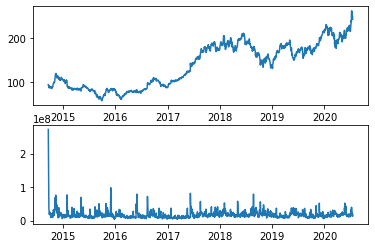

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(close)

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(vol);